# Método variacional lineal

El método variacional lineal permite resolver el problema

$$
H\psi = E \psi
$$

al expresar la eigenfunción como una combinación lineal de funciones $\{\phi_i\}$. Cuando las funciones $\phi_i$ forman un conjunto completo, la combinación lineal es exacta, sin embargo, en la práctica se usan solo algunas funciones, por lo que la función de onda resultante es aproximada, es decir

$$
\psi_{\rm prueba} = \sum_{i=1} c_i \phi_i  
$$

```{important}
Al sustituir la expansión de la eigenfunción en la ecuación de Schrödinger, se obtiene la ecuación

$$
\mathcal{H} \mathcal{C} = \mathcal{S} \mathcal{C} \mathcal{\varepsilon}
$$

En general se realizan los siguientes pasos:

1. Se seleccionan las funciones $\phi_i$ que se usarán para expandir la eigenfunción, es común elegir funciones exponenciales o gaussianas.
2. Se evalúan las matrices $\mathcal{H}$, y $\mathcal{S}$.
3. Se resuelve el problema de valores propios $\mathcal{H}\mathcal{C} = \mathcal{S}\mathcal{C} \mathcal{\epsilon}$.
4. Se construye la eigenfunción utilizando los coeficientes obtenidos.
```

Una consecuencia de este método es que sin importar las funciones $\phi_i$ que se usen, siempre que cumplan con las condiciones de frontera del problema, la función de prueba siempre tiene una energía mayor o igual a la solución exacta. Por lo tanto, podemos construir varias funciones de prueba y tomar la que de la energía más baja.

Para ejemplificar este procedimiento, resolveremos el `átomo de hidrógeno` utilizando el método variacional lineal.

**Importe las siguientes librerías**

- numpy
- sympy

In [1]:
# Librerías

In [2]:
import numpy as np
import sympy as sp

## Átomo de hidrógeno con dos gausianas

**Paso 1.** Seleccionar funciones $\phi_i$ para construir $\psi_{\rm prueba}$

$$
\psi_{\rm prueba} = \sum_{i=1}^2 c_i \phi_i  
$$

Para este ejemplo tomaremos dos funciones gaussianas:

$$
\phi_1 = \left( \frac{2(1.309756377)}{\pi} \right)^{\frac{3}{4}} e^{-1.309756377r^2}
$$

$$
\phi_2 = \left( \frac{2(0.233135974)}{\pi} \right)^{\frac{3}{4}} e^{-0.233135974r^2}
$$

**Defina las funciones gaussianas usando álgebra simbólica**

In [3]:
# Defina funciones

In [4]:


r = sp.Symbol("r")
phi_1 = (2*1.309756377/sp.pi)**(3/4)*sp.exp(-1.309756377*r**2)
phi_2 = (2*0.233135974/sp.pi)**(3/4)*sp.exp(-0.233135974*r**2)
print("phi_1")
sp.pprint(phi_1)
print("phi_2")
sp.pprint(phi_2)

phi_1
                                       2
                  -0.75  -1.309756377⋅r 
2.05904286572975⋅π     ⋅ℯ               
phi_2
                                        2
                   -0.75  -0.233135974⋅r 
0.564260261842472⋅π     ⋅ℯ               


**Paso 2.** Evaluar las matrices $\mathcal{H}$ y $\mathcal{S}$.

El Hamiltoniano del átomo de hidrógeno es

$$
\hat{H} = -\frac{1}{2} \nabla^2 - \frac{1}{r} = -\frac{1}{2} \frac{1}{r} \frac{d^2}{dr^2} r -\frac{1}{r}
$$

Por tanto, la matriz $\mathcal{H}$ es

$$
\mathcal{H} = \begin{pmatrix} H_{11} & H_{12}\\
H_{21} & H_{22}
\end{pmatrix} = \begin{pmatrix} 4 \pi\int_0^\infty \phi_1^* \hat{H} \phi_1 r^2dr & 4 \pi\int_0^\infty \phi_1^* \hat{H} \phi_2 r^2dr\\
4 \pi\int_0^\infty \phi_2^* \hat{H} \phi_1 r^2dr & 4 \pi\int_0^\infty \phi_2^* \hat{H} \phi_2 r^2dr
\end{pmatrix}
$$

**Genere una matriz de 2x2 y evalúe las integrales**

In [5]:
# Matriz H

In [6]:
H_1 = -1/2*1/r*sp.diff(r*phi_1,r,r) - 1/r*phi_1
H_2 = -1/2*1/r*sp.diff(r*phi_2,r,r) - 1/r*phi_2

H = sp.zeros(2)
H[0,0] = 4*sp.pi*sp.integrate(phi_1*H_1*r**2,(r,0,sp.oo))
H[0,1] = 4*sp.pi*sp.integrate(phi_1*H_2*r**2,(r,0,sp.oo))
H[1,0] = 4*sp.pi*sp.integrate(phi_2*H_1*r**2,(r,0,sp.oo))
H[1,1] = 4*sp.pi*sp.integrate(phi_2*H_2*r**2,(r,0,sp.oo))
H=H.evalf()
H

Matrix([
[ 0.138363165534784, -0.489760093394105],
[-0.489760093394105, -0.420799694276402]])

La matriz S es

$$
\mathcal{S} = \begin{pmatrix} S_{11} & S_{12}\\
S_{21} & S_{22}
\end{pmatrix} = \begin{pmatrix} 4 \pi\int_0^\infty \phi_1^* \phi_1 r^2dr & 4 \pi\int_0^\infty \phi_1^* \phi_2 r^2dr\\
4 \pi\int_0^\infty \phi_2^* \phi_1 r^2dr & 4 \pi\int_0^\infty \phi_2^* \phi_2 r^2dr
\end{pmatrix}
$$

**Genere una matriz de 2x2 y evalúe las integrales**

In [7]:
# Matriz S

In [8]:
S = sp.zeros(2)
S[0,0] = 4*sp.pi*sp.integrate(phi_1*phi_1*r**2,(r,0,sp.oo))
S[0,1] = 4*sp.pi*sp.integrate(phi_1*phi_2*r**2,(r,0,sp.oo))
S[1,0] = 4*sp.pi*sp.integrate(phi_2*phi_1*r**2,(r,0,sp.oo))
S[1,1] = 4*sp.pi*sp.integrate(phi_2*phi_2*r**2,(r,0,sp.oo))
S

Matrix([
[              1.0, 0.606235570910297],
[0.606235570910297,               1.0]])

**Paso 3.** Resolver $\color{red}{\mathcal{H}\mathcal{C} = \mathcal{S}\mathcal{C} \mathcal{\epsilon}}$

Para ello utilizaremos la instrucción
~~~python
E,C = LA.eigh(H,S)
~~~
la cual resuelve directamente el problema $\mathcal{H}\mathcal{C} = \mathcal{S}\mathcal{C} \mathcal{\epsilon}$. La columna de $\mathcal{C}$ con la energía más baja nos indica los coeficientes de la combinación lineal de la eigenfunción.

In [9]:
# Resuelva HC = SCe

In [10]:
from scipy import linalg as LA
import numpy

H = np.array(H).astype(np.float64)
S = np.array(S).astype(np.float64)

E,C = LA.eigh(H,S)
print(E)
print(C)

[-0.4831514   0.97547404]
[[-0.2599737  -1.23024195]
 [-0.82078782  0.95256965]]


**Paso 4.** Sustituir los coeficientes en $\psi_{\rm prueba} = \displaystyle \sum_{i=1}^2 c_i \phi_i$ para construir la función de onda.

In [11]:
# Genere función de prueba

In [12]:
psi_p = C[0][0]*phi_1 + C[1][0]*phi_2
psi_p

-0.535296992908604*exp(-1.309756377*r**2)/pi**0.75 - 0.46313795048033*exp(-0.233135974*r**2)/pi**0.75

Adicionalmente, se puede comprobar que se cumple la condición de normalización. **Evalúe la integral**

$$
4\pi \int_0^{\infty} r^2 |\psi_{\rm prueba}|^2 dr= 1
$$

In [13]:
# Integral

In [14]:
4*sp.pi*sp.integrate(psi_p*psi_p*r**2,(r,0,sp.oo))

1.00000000000000

**Almacene la función de prueba, así como cada una de las gausianas que la componen para comparar con la solución exacta**.

In [15]:
# Código

In [16]:
psi_2g = psi_p
psi_2g_1 = phi_1
psi_2g_2 = phi_2

**Genere la gráfica de las dos funciones $\psi_1$ y $\psi_2$, así como la $\psi_{\rm prueba}$ y la solución exacta para el átomo de hidrógeno (1s)**

```{tip}
Recuerde

$$
1s = \pi^{-1/2} e^{-|r|}
$$
```

In [17]:
# Gráfica

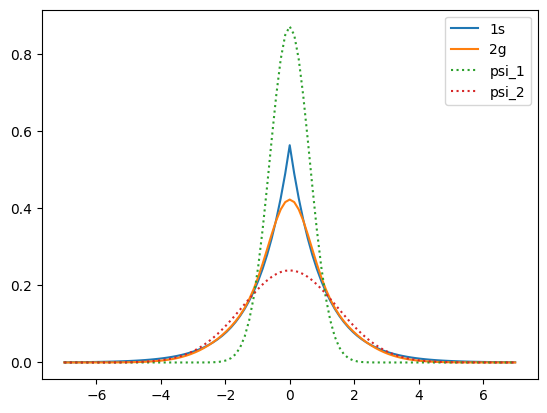

In [18]:
from matplotlib import pyplot as plt

s=1/sp.sqrt(sp.pi)*sp.exp(-sp.Abs(r))
lam_s = sp.lambdify(r,s,modules=['numpy'])
lam_psi_2g = sp.lambdify(r,psi_2g,modules=['numpy'])
lam_psi_2g_1 = sp.lambdify(r,psi_2g_1,modules=['numpy'])
lam_psi_2g_2 = sp.lambdify(r,psi_2g_2,modules=['numpy'])

r1 = np.linspace(-7,7,101)
psi_s = lam_s(r1)
psi_2g1 = lam_psi_2g(r1)
psi_2g_1 = lam_psi_2g_1(r1)
psi_2g_2 = lam_psi_2g_2(r1)

plt.plot(r1,psi_s,label="1s")
plt.plot(r1,-psi_2g1,label="2g")
plt.plot(r1,psi_2g_1,label="psi_1",linestyle=':')
plt.plot(r1,psi_2g_2,label="psi_2",linestyle=':')
plt.legend()
plt.show()

## Átomo de hidrógeno con tres gausianas

**Paso 1.** Seleccionar funciones $\phi_i$ para construir $\psi_{\rm prueba}$

$$
\psi_{\rm prueba} = \sum_{i=1} c_i \phi_i  
$$

Para este ejemplo **declare tres funciones gaussianas**

$$
\phi_1 = \left( \frac{2(3.42525091)}{\pi} \right)^{\frac{3}{4}} e^{-3.42525091r^2}
$$

$$
\phi_2 = \left( \frac{2(0.62391373)}{\pi} \right)^{\frac{3}{4}} e^{-0.62391373r^2}
$$

$$
\phi_3 = \left( \frac{2(0.16885540)}{\pi} \right)^{\frac{3}{4}} e^{-0.16885540r^2}
$$

In [19]:
# Declare funciones

In [20]:
sp.init_printing()

r = sp.Symbol("r")
phi_1 = (2*3.42525091/sp.pi)**(3/4)*sp.exp(-3.42525091*r**2)
phi_2 = (2*0.62391373/sp.pi)**(3/4)*sp.exp(-0.62391373*r**2)
phi_3 = (2*0.16885540/sp.pi)**(3/4)*sp.exp(-0.16885540*r**2)
print("phi_1")
sp.pprint(phi_1)
print("phi_2")
sp.pprint(phi_2)
print("phi_3")
sp.pprint(phi_3)

phi_1
                                      2
                  -0.75  -3.42525091⋅r 
4.23439910835034⋅π     ⋅ℯ              
phi_2
                                     2
                 -0.75  -0.62391373⋅r 
1.1806356801173⋅π     ⋅ℯ              
phi_3
                                      2
                   -0.75  -0.1688554⋅r 
0.443005085955685⋅π     ⋅ℯ             


El Hamiltoniano del átomo de hidrógeno es

$$
\hat{H} = -\frac{1}{2} \nabla^2 - \frac{1}{r} = -\frac{1}{2} \frac{1}{r} \frac{d^2}{dr^2} r -\frac{1}{r}
$$

Por tanto, la matriz $\mathcal{H}$ es

$$
\mathcal{H} = \begin{pmatrix} H_{11} & H_{12} & H_{13}\\
H_{21} & H_{22} & H_{23}\\
H_{31} & H_{32} & H_{33}\\
\end{pmatrix} = \begin{pmatrix} 4 \pi\int_0^\infty \phi_1^* \hat{H} \phi_1 r^2dr & 4 \pi\int_0^\infty \phi_1^* \hat{H} \phi_2 r^2dr & 4 \pi\int_0^\infty \phi_1^* \hat{H} \phi_3 r^2dr\\
4 \pi\int_0^\infty \phi_2^* \hat{H} \phi_1 r^2dr & 4 \pi\int_0^\infty \phi_2^* \hat{H} \phi_2 r^2dr & 4 \pi\int_0^\infty \phi_2^* \hat{H} \phi_3 r^2dr\\
4 \pi\int_0^\infty \phi_3^* \hat{H} \phi_1 r^2dr & 4 \pi\int_0^\infty \phi_3^* \hat{H} \phi_2 r^2dr & 4 \pi\int_0^\infty \phi_3^* \hat{H} \phi_3 r^2dr\\
\end{pmatrix}
$$

**Evalúe la matriz H**

In [21]:
# Matriz H

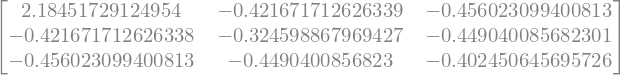

In [22]:
H_1 = -1/2*1/r*sp.diff(r*phi_1,r,r) - 1/r*phi_1
H_2 = -1/2*1/r*sp.diff(r*phi_2,r,r) - 1/r*phi_2
H_3 = -1/2*1/r*sp.diff(r*phi_3,r,r) - 1/r*phi_3

H = sp.zeros(3)
H[0,0] = 4*sp.pi*sp.integrate(phi_1*H_1*r**2,(r,0,sp.oo))
H[0,1] = 4*sp.pi*sp.integrate(phi_1*H_2*r**2,(r,0,sp.oo))
H[0,2] = 4*sp.pi*sp.integrate(phi_1*H_3*r**2,(r,0,sp.oo))
H[1,0] = 4*sp.pi*sp.integrate(phi_2*H_1*r**2,(r,0,sp.oo))
H[1,1] = 4*sp.pi*sp.integrate(phi_2*H_2*r**2,(r,0,sp.oo))
H[1,2] = 4*sp.pi*sp.integrate(phi_2*H_3*r**2,(r,0,sp.oo))
H[2,0] = 4*sp.pi*sp.integrate(phi_3*H_1*r**2,(r,0,sp.oo))
H[2,1] = 4*sp.pi*sp.integrate(phi_3*H_2*r**2,(r,0,sp.oo))
H[2,2] = 4*sp.pi*sp.integrate(phi_3*H_3*r**2,(r,0,sp.oo))

H=H.evalf()
H

**Evalúe la matriz S**

$$
\mathcal{S} = \begin{pmatrix} S_{11} & S_{12} & S_{13}\\
S_{21} & S_{22} & S_{23} \\
S_{31} & S_{32} & S_{33} \\
\end{pmatrix} = \begin{pmatrix} 4 \pi\int_0^\infty \phi_1^* \phi_1 r^2dr & 4 \pi\int_0^\infty \phi_1^* \phi_2 r^2dr & 4 \pi\int_0^\infty \phi_1^* \phi_3 r^2dr\\
4 \pi\int_0^\infty \phi_2^* \phi_1 r^2dr & 4 \pi\int_0^\infty \phi_2^* \phi_2 r^2dr & 4 \pi\int_0^\infty \phi_2^* \phi_3 r^2dr\\
4 \pi\int_0^\infty \phi_2^* \phi_3 r^2dr & 4 \pi\int_0^\infty \phi_3^* \phi_2 r^2dr & 4 \pi\int_0^\infty \phi_3^* \phi_3 r^2dr
\end{pmatrix}
$$

In [23]:
# Matriz S

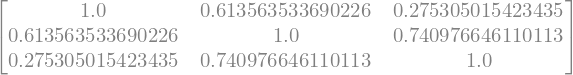

In [24]:
S = sp.zeros(3)
S[0,0] = 4*sp.pi*sp.integrate(phi_1*phi_1*r**2,(r,0,sp.oo))
S[0,1] = 4*sp.pi*sp.integrate(phi_1*phi_2*r**2,(r,0,sp.oo))
S[0,2] = 4*sp.pi*sp.integrate(phi_1*phi_3*r**2,(r,0,sp.oo))
S[1,0] = 4*sp.pi*sp.integrate(phi_2*phi_1*r**2,(r,0,sp.oo))
S[1,1] = 4*sp.pi*sp.integrate(phi_2*phi_2*r**2,(r,0,sp.oo))
S[1,2] = 4*sp.pi*sp.integrate(phi_2*phi_3*r**2,(r,0,sp.oo))
S[2,0] = 4*sp.pi*sp.integrate(phi_3*phi_1*r**2,(r,0,sp.oo))
S[2,1] = 4*sp.pi*sp.integrate(phi_3*phi_2*r**2,(r,0,sp.oo))
S[2,2] = 4*sp.pi*sp.integrate(phi_3*phi_3*r**2,(r,0,sp.oo))
S

**Paso 3.** Resolver $\color{red}{\mathcal{H}\mathcal{C} = \mathcal{S}\mathcal{C} \mathcal{\epsilon}}$

Para ello utilizaremos la instrucción
~~~python
E,C = LA.eigh(H,S)
~~~
la cual resuelve directamente el problema $\mathcal{H}\mathcal{C} = \mathcal{S}\mathcal{C} \mathcal{\epsilon}$. La columna de $\mathcal{C}$ con la energía más baja nos indica los coeficientes de la combinación lineal de la función de onda.

In [25]:
# Resuelva HC=SCe

In [26]:
from scipy import linalg as LA

H = np.array(H).astype(np.float64)
S = np.array(S).astype(np.float64)

E,C = LA.eigh(H,S)
print(E)
print(C)

[-0.4957408   0.32474441  4.70775684]
[[ 0.09347468  0.06200336 -1.34099753]
 [ 0.37301543  1.35732612  1.31521322]
 [ 0.64687893 -1.33378635 -0.55358619]]


**Paso 4.** Sustituir los coeficientes en $\psi_{\rm prueba} =\displaystyle  \sum_{i=1}^3 c_i \phi_i$ para construir la función de prueba.

In [27]:
# Genere la función de prueba

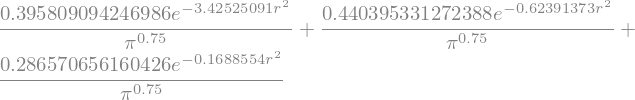

In [28]:
psi_p = C[0][0]*phi_1 + C[1][0]*phi_2 + C[2][0]*phi_3
psi_p

**Compruebe la normalización**

In [29]:
# Normalización

In [30]:
4*sp.pi*sp.integrate(psi_p*psi_p*r**2,(r,0,sp.oo))

**Guarde sus funciones para graficar**

In [31]:
# Guarde funciones

In [32]:
psi_3g = psi_p
psi_3g_1 = phi_1
psi_3g_2 = phi_2
psi_3g_3 = phi_3

**Genere la gráfica con tres gaussianas**

In [33]:
# Gráfica

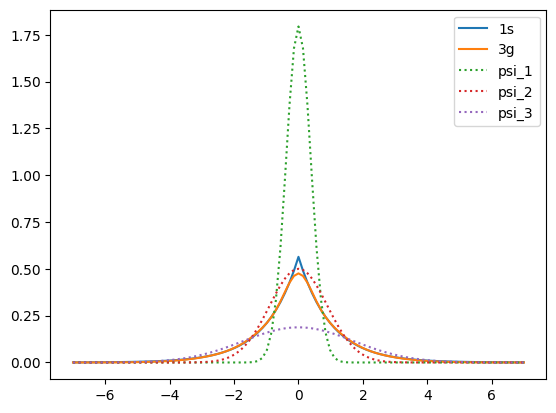

In [34]:
from matplotlib import pyplot as plt

s=1/sp.sqrt(sp.pi)*sp.exp(-sp.Abs(r))
lam_s = sp.lambdify(r,s,modules=['numpy'])
lam_psi_3g = sp.lambdify(r,psi_3g,modules=['numpy'])
lam_psi_3g_1 = sp.lambdify(r,psi_3g_1,modules=['numpy'])
lam_psi_3g_2 = sp.lambdify(r,psi_3g_2,modules=['numpy'])
lam_psi_3g_3 = sp.lambdify(r,psi_3g_3,modules=['numpy'])

r1 = np.linspace(-7,7,101)
psi_s = lam_s(r1)
psi_3g1 = lam_psi_3g(r1)
psi_3g_1 = lam_psi_3g_1(r1)
psi_3g_2 = lam_psi_3g_2(r1)
psi_3g_3 = lam_psi_3g_3(r1)

plt.plot(r1,psi_s,label="1s")
plt.plot(r1,psi_3g1,label="3g")
plt.plot(r1,psi_3g_1,label="psi_1",linestyle=':')
plt.plot(r1,psi_3g_2,label="psi_2",linestyle=':')
plt.plot(r1,psi_3g_3,label="psi_3",linestyle=':')
plt.legend()
plt.show()

## Átomo de hidrógeno dos gaussianas vs tres gaussianas

En la gráfica se compara la eigenfunción aproximada por el método variacional lineal con dos gausianas y con tres gausianas contra la solución exacta del átomo de hidrógeno del orbital 1s. 

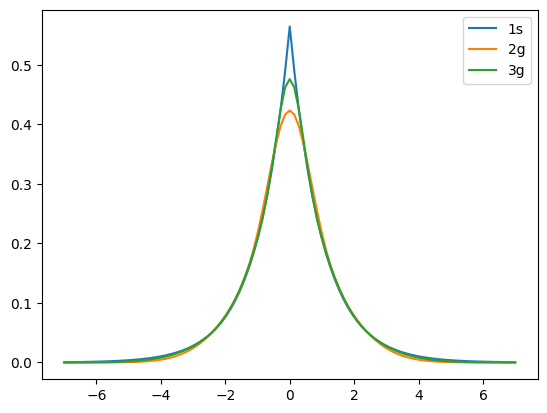

In [35]:
from matplotlib import pyplot as plt

s=1/sp.sqrt(sp.pi)*sp.exp(-sp.Abs(r))
lam_s = sp.lambdify(r,s,modules=['numpy'])
lam_psi_2g = sp.lambdify(r,psi_2g,modules=['numpy'])
lam_psi_3g = sp.lambdify(r,psi_3g,modules=['numpy'])

r1 = np.linspace(-7,7,101)
psi_s = lam_s(r1)
psi_2g1 = lam_psi_2g(r1)
psi_3g1 = lam_psi_3g(r1)

plt.plot(r1,psi_s,label="1s")
plt.plot(r1,-psi_2g1,label="2g")
plt.plot(r1,psi_3g1,label="3g")
plt.legend()
plt.show()

## Referencias

- J.F. Pérez-Torres, Dilemma of the “Best Wavefunction”: Comparing Results of the STO-NG Procedure versus the Linear Variational Method, J. Chem. Educ. 96, 704 (2019).
- V.W.D. Cruzeiro, A. Roitberg, y N.C. Polfer, Interactively Applying the Variational Method to the Dihydrogen Molecule: Exploring Bonding and Antibonding, J. Chem. Educ. 93, 1578 (2016).
- P. W. Atkins, y R. Friedman, Molecular Quantum Mechanics (Oxford University Press, 2005).
- F.L. Pilar, Elementary Quantum Chemistry (Dover ed., 2001).
- I.N. Levine, D.H. Busch, y H. Shull, Quantum chemistry (Pearson Prentice Hall Upper Saddle River, NJ, 2009).
- D.A. McQuarrie y J.D. Simon, Physical Chemistry: A Molecular Approach (University Science Books, 1997).